In [1]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.0070171356201171875


In [4]:
start = time()
d = a + b
print(time()-start)
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_name(1))

0.0009081363677978516
GeForce GTX 1080 Ti
GeForce GTX 1080 Ti


In [3]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


In [31]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
import torch
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

print(features[0],labels[0])

tensor([-0.4957, -2.6436]) tensor(12.2144)


<ipython-input-32-b7ed6b60f7e1>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


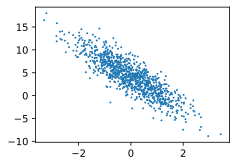

In [32]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import *

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [33]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [34]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.9085, -0.6558],
        [-1.8446, -0.4574],
        [-0.6306,  0.7338],
        [-1.3867, -0.7797],
        [ 0.1014,  0.1764],
        [-0.6549,  1.3422],
        [ 0.1206,  0.0908],
        [ 0.1697,  0.7654],
        [ 0.7425,  1.0930],
        [ 1.6905,  0.5108]]) tensor([ 8.2326,  2.0874,  0.4473,  4.0806,  3.7959, -1.6840,  4.1273,  1.9302,
         1.9789,  5.8494])


In [35]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [36]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [37]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

In [38]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [39]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size
        # 注意这里更改param时用的param.data

In [40]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
print(true_w,'\n',w)
print(true_b,'\n',b)

epoch 1, loss 0.036047
epoch 2, loss 0.000134
epoch 3, loss 0.000052
[2, -3.4] 
 tensor([[ 1.9993],
        [-3.4002]], requires_grad=True)
4.2 
 tensor([4.2008], requires_grad=True)


In [41]:
import torch.utils.data as Data
import numpy as np
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),
                        dtype=torch.float)
labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()),
                       dtype=torch.float)
batch_size = 10
dataset = Data.TensorDataset(features,labels)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

for X,y in data_iter:
    print(X,y)
    break

tensor([[ 1.5175,  1.3278],
        [ 2.6595, -0.6004],
        [-1.0487,  0.4307],
        [ 0.7550,  0.9152],
        [ 0.8531, -0.2371],
        [-0.8648,  0.2920],
        [-1.5643, -0.6954],
        [-0.3637, -0.5074],
        [ 0.0429, -1.4884],
        [ 0.3198,  0.3348]]) tensor([ 2.7314, 11.5681,  0.6394,  2.6018,  6.6821,  1.4866,  3.4317,  5.1903,
         9.3511,  3.7039])


In [42]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet,self).__init__()
        self.linear = nn.Linear(n_feature,1)
    def forward(self,x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(features.shape, net)

torch.Size([1000, 2]) LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [43]:
net_1 = nn.Sequential(
    nn.Linear(num_inputs,10),
    nn.Linear(10,1)
)
net_2 = nn.Sequential()
net_2.add_module('layer1',nn.Linear(num_inputs,10))
net_2.add_module('layer2',nn.Linear(10,1))
from collections import OrderedDict
net_3 = nn.Sequential(OrderedDict([
    ('layer1',nn.Linear(num_inputs,10)),
    ('layer2',nn.Linear(10,1))
]))
print(net,'\n',net_1,'\n',net_2,'\n',net_3)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
) 
 Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
) 
 Sequential(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
) 
 Sequential(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=1, bias=True)
)


In [44]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.1254,  0.1982]], requires_grad=True)
Parameter containing:
tensor([-0.4401], requires_grad=True)


In [45]:
from torch.nn import init
net = nn.Sequential(nn.Linear(num_inputs,1))
print(net[0].weight, net[0].bias)
init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)
print(net[0].weight, net[0].bias)

Parameter containing:
tensor([[ 0.1626, -0.5042]], requires_grad=True) Parameter containing:
tensor([-0.4967], requires_grad=True)
Parameter containing:
tensor([[-0.0128,  0.0049]], requires_grad=True) Parameter containing:
tensor([0.], requires_grad=True)


In [46]:
loss = nn.MSELoss()
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [47]:
num_epochs = 3
for param in net.parameters():
    print(param)
for epoch in range(1,num_epochs + 1):
    for X, y in data_iter:
        #print(X[0],y[0])
        output = net(X)
        l = loss(output, y.view(-1,1))
        optimizer.zero_grad() # 梯度清零
        l.backward()
        optimizer.step()
    #print('epoch %d loss %lf' %(epoch, l.item()))
dense = net[0]
print(dense.weight[0,0].item(),dense.weight[0,1].item())
print(dense.bias.item())

Parameter containing:
tensor([[-0.0128,  0.0049]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)
2.0001132488250732 -3.399900197982788
4.1997880935668945


In [48]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import  sys
sys.path.append('..')

mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST',
                                                train=True,
                                                download=True,
                                                transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST',
                                               train=False,
                                               download=True,
                                               transform=transforms.ToTensor())

print(type(mnist_train))
print(len(mnist_train),len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [49]:
features, label = mnist_train[0]
print(features.shape,label)

torch.Size([1, 28, 28]) 9


In [50]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    #d2l.use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
X, y = [], []

In [51]:
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         num_workers=8)
test_iter = torch.utils.data.DataLoader(mnist_test,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        num_workers=8)
start = time.time()
for X,y in train_iter:
    continue
print('%.2lf sec' %(time.time()-start))

1.28 sec


In [52]:
import torch
import torchvision
import numpy as np

def load_data_fashion_mnist(batch_size,
                            resize=None,
                            root='./Datasets/FashionMNIST'):
    """Download the fashion mnist dataset and then load into memory."""
    trans = []
    if resize:
        trans.append(torchvision.transforms.Resize(size=resize))
    trans.append(torchvision.transforms.ToTensor())

    transform = torchvision.transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root=root,
                                                    train=True,
                                                    download=True,
                                                    transform=transform)
    mnist_test = torchvision.datasets.FashionMNIST(root=root,
                                                   train=False,
                                                   download=True,
                                                   transform=transform)

    train_iter = torch.utils.data.DataLoader(mnist_train,
                                             batch_size=batch_size,
                                             shuffle=True,
                                             num_workers=4)
    test_iter = torch.utils.data.DataLoader(mnist_test,
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=4)

    return train_iter, test_iter

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

num_inputs = 784
num_outputs = 10
W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)),
                 dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

def net(X):
    return softmax(torch.mm((X.view(-1,num_inputs)),W)+b)

def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1,1)))

def accuracy(y_hat,y):
    return (y_hat.argmax(dim=1)==y).float().mean().item()

# 本函数已保存在d2lzh_pytorch包中方便以后使用。
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [53]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))
X = torch.rand((2,5))
X_prob = softmax(X)
print(X_prob,'\n',X_prob.sum(dim=1))
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1, 1))
print(accuracy(y_hat,y))
print(net)
print(evaluate_accuracy(test_iter, net))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])
tensor([[0.3054, 0.1324, 0.1491, 0.2365, 0.1765],
        [0.1457, 0.2666, 0.1668, 0.2631, 0.1577]]) 
 tensor([1., 1.])
0.5
<function net at 0x7f30f4d45670>
0.0907


In [54]:
num_epochs, lr = 5, 0.1

# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

In [55]:
import torch
from torch import nn
from torch.nn import init
import numpy as np

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self, x): # x shape: (batch, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1))
        return y

net = LinearNet(num_inputs, num_outputs)

# 本函数已保存在d2lzh_pytorch包中方便以后使用
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [56]:
from collections import OrderedDict

net = nn.Sequential(
    # FlattenLayer(),
    # nn.Linear(num_inputs, num_outputs)
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)

init.normal_(net[1].weight, mean=0, std=0.01)
init.constant_(net[1].bias, val=0)

loss = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
          None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.749, test acc 0.772
epoch 2, loss 0.0022, train acc 0.812, test acc 0.809
epoch 3, loss 0.0021, train acc 0.825, test acc 0.822
epoch 4, loss 0.0020, train acc 0.831, test acc 0.806
epoch 5, loss 0.0019, train acc 0.838, test acc 0.808


In [57]:
import torch
import numpy as np

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)),
                  dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)),
                  dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params: #设定梯度
    param.requires_grad_(requires_grad=True)

def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

In [58]:
import torch
from torch import nn
from torch.nn import init
import numpy as np

num_inputs, num_outputs, num_hiddens = 784, 10, 256

net = nn.Sequential(
    FlattenLayer(),
    nn.Linear(num_inputs,num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens,num_outputs),
    )

for params in net.parameters():
    #print(params)
    init.normal_(params, mean=0, std=0.01)
    #print(params)

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
          None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.699, test acc 0.765
epoch 2, loss 0.0019, train acc 0.823, test acc 0.829
epoch 3, loss 0.0016, train acc 0.844, test acc 0.810
epoch 4, loss 0.0015, train acc 0.856, test acc 0.814
epoch 5, loss 0.0014, train acc 0.862, test acc 0.830


In [59]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [60]:
def init_params():
    w = torch.randn((num_inputs,1),requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def l2_penalty(w):
    return (w**2).sum()/2

In [61]:
def fit_and_plot_pytorch(wd):
    # 对权重参数衰减。权重名称一般是以weight结尾
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight],
                                  lr=lr,
                                  weight_decay=wd) # 对权重参数衰减
    optimizer_b = torch.optim.SGD(params=[net.bias],
                                  lr=lr)  # 不对偏差参数衰减

    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()

            l.backward()

            # 对两个optimizer实例分别调用step函数，从而分别更新权重和偏差
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())

    print('L2 norm of w:', net.weight.data.norm().item())

In [62]:
import torch
import torch.nn as nn

class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()
train_iter, test_iter = load_data_fashion_mnist(batch_size)

num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)),
                  dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)),
                  dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)),
                  dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]


net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.Linear(num_hiddens1, num_hiddens2),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(num_hiddens2, 10)
        )

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
          None, None, optimizer)

epoch 1, loss 0.0044, train acc 0.563, test acc 0.694
epoch 2, loss 0.0021, train acc 0.797, test acc 0.791
epoch 3, loss 0.0018, train acc 0.829, test acc 0.805
epoch 4, loss 0.0016, train acc 0.845, test acc 0.841
epoch 5, loss 0.0016, train acc 0.853, test acc 0.838
